##  One-Class SVM 이상 탐지(분류모델 기반 이상탐지)
___
* 정의
```
# Unsupervised Anomaly Deteciotn 중 하나의 기법
# 데이터를 N차원 좌표축으로 표현하고, 원점과의 거리를 기준으로 초평면(Hyper plane)을 그어 Classification하는 방법
# SVM(Support Vector Machine)은 Binary-Classification에 활용되며 Support Vector 간의 Margine을 기준으로 Hyper Plane을 나눔 (https://deep-learning-study.tistory.com/288)
# 반면 OCSVM은 원점을 기준으로 정상과 이상에 대한 Hyper Plane을 찾는 방법
# 일반적으로 Linear Support Vector Machine을 이용하지만, 영역의 구분이 복잡해지면 RBF(Radial Basis Functions)와 같은 커널 함수를 사용
# 선형으로 데이터를 분리할 수 없을때 RBF(방사형) 커널 활용(https://datascienceschool.net/03%20machine%20learning/13.03%20%EC%BB%A4%EB%84%90%20%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0.html)
# Loss 함수 : min(Abnormal 데이터들과 Hyper Plane 사이의 거리)
```
<img src = "https://drive.google.com/uc?id=1q1-76h31hhpwXrNMQ3ZyuBWX2xXcxFTF" width="500" height="400">

* 장단점
```
  # [good] 데이터 Label이 존재하지 않아도 사용 가능
  # [good] 저차원이나 고차원의 적은 데이터에서 일반화 능력이 좋음
  # [good] 데이터 특성이 적어도(피처데이터 갯수가 적어도) 성능이 좋게 나오는 편, Robust 함, Isolation Forest는 피처데이터의 개수가 많아야 성능이 좋아짐.
  # [bad] Kernel 기반의 방법론, 데이터가 늘어날 수록 연산량이 크게 증가함
  # [bad] Scaling에 민감함. (Isolation Forest는 스케일링에 민감하지 않음)
  # [bad] Hyper parameter 조절을 잘 해야 최적의 모델을 구할 수 있음
```
  
* 사용방법
```
# from sklearn import svm
# Hyper-paramter 결정 (※ Kernel(선형 vs. 비선형), gamma(Support Vector와의 거리), nu 등)
# 데이터 현황(분포 및 특성) 파악
# 학습 및 예측
```

* 현업사례
```
# 금융 이상 거래 탐지 
# 온라인 서명 검증 
```

### 실습
___

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#import matplotlib.font_manager
from sklearn import svm

rng = np.random.RandomState(50)
# ▶ Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# ▶ Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# ▶ Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

In [2]:
X_outliers

,x1,x2
0,-0.512541,-0.835008
1,0.534193,2.213399
2,3.554723,-1.377372
3,-2.148891,1.663309
4,2.824269,-3.808197
5,-2.012237,-0.855508
6,-2.197574,-0.361293
7,2.660022,0.908001
8,-3.185357,-0.711988
9,3.254340,-1.926457


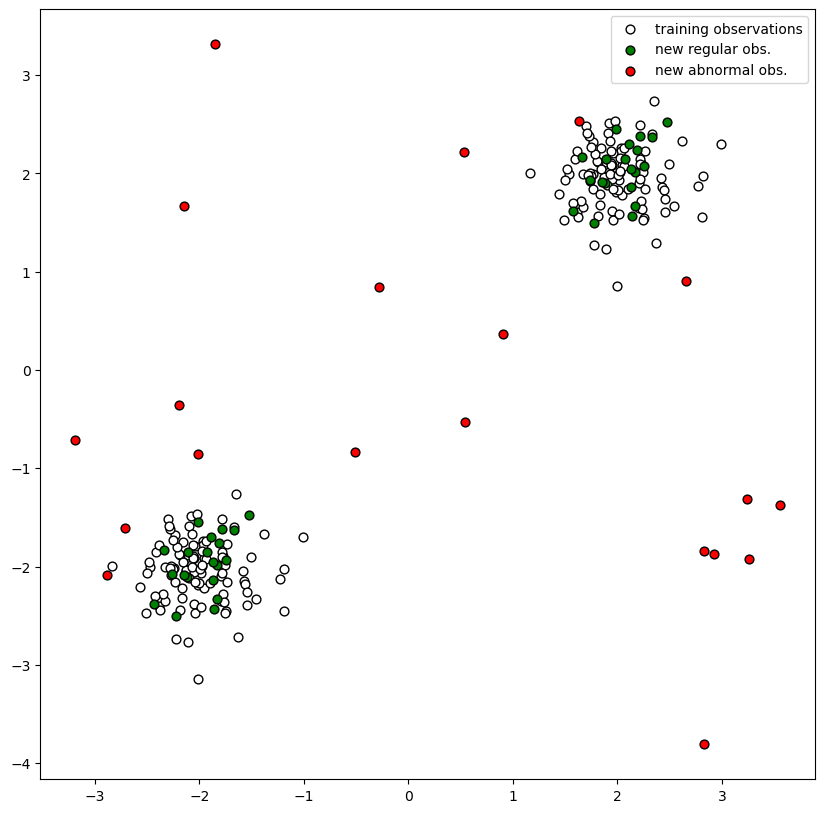

In [3]:
import matplotlib.pyplot as plt
#plt.style.use(['dark_background'])

plt.rcParams['figure.figsize'] = [10, 10];
p1 = plt.scatter(X_train.x1, X_train.x2, c='white', s=20*2, edgecolor='k', label='training observations');

# ▶ Test set, 정상 Sample 
p2 = plt.scatter(X_test.x1, X_test.x2, c='green', s=20*2, edgecolor='k', label='new regular obs.');

# ▶ Outlier set
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red', s=20*2, edgecolor='k', label='new abnormal obs.');

plt.legend();
# plt.gcf().set_size_inches(5, 5)

In [4]:
# ▶ 모델 학습 및 평가
# ▶ Kernel : Hyper plane의 종류 (Linear vs rbf), 현재 데이터는 linear는 어렵다.
# ▶ gamma : Support vector와의 거리, 크면 가까이 있는 데이터, 작으면 먼 데이터 참조
# ▶ nu : Hyper plane 밖에 있는(abnormal) data의 비율, contamination과 유사한 개념

clf = svm.OneClassSVM(nu=0.5, kernel="rbf", gamma=0.8)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [5]:
y_pred_outliers

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1], dtype=int64)

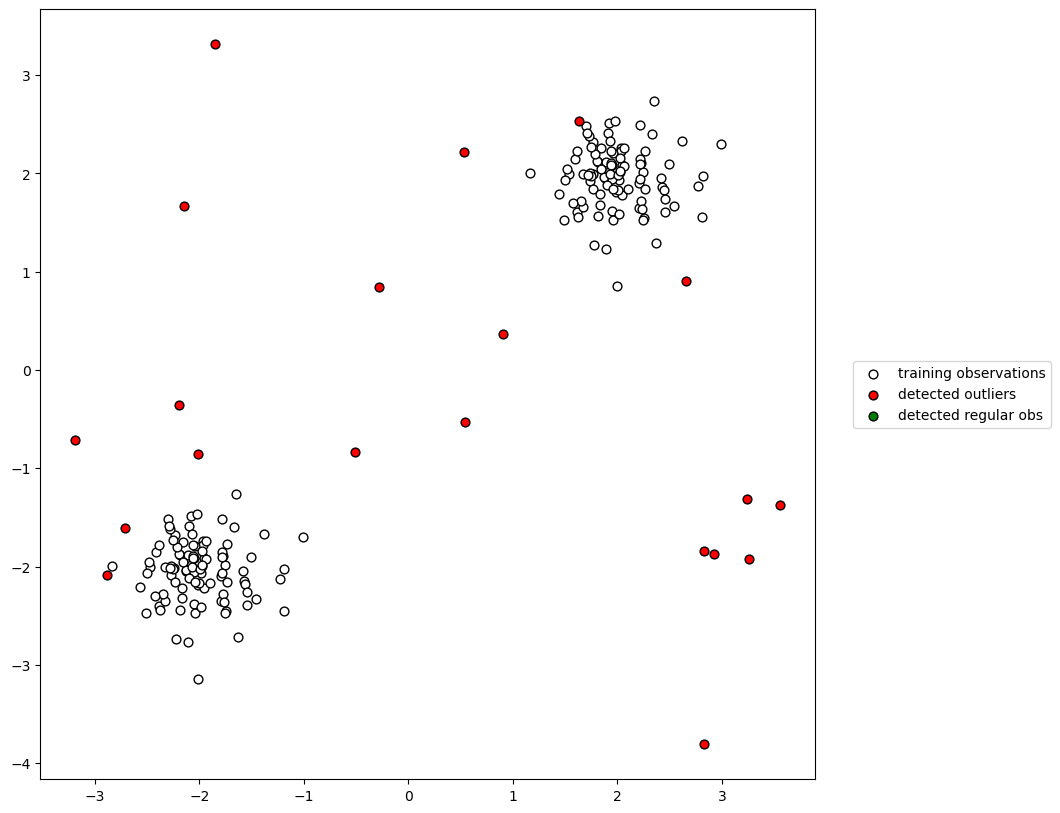

In [6]:
# ▶ Outlier Label 할당
X_outliers = X_outliers.assign(y = y_pred_outliers)

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*2, edgecolor='k', label="training observations")

p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='red', s=20*2, edgecolor='k', label="detected outliers")

p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='green', s=20*2, edgecolor='k', label="detected regular obs")

plt.legend(loc='center left', bbox_to_anchor=(1.04,0.5));
plt.gcf().set_size_inches(10, 10)

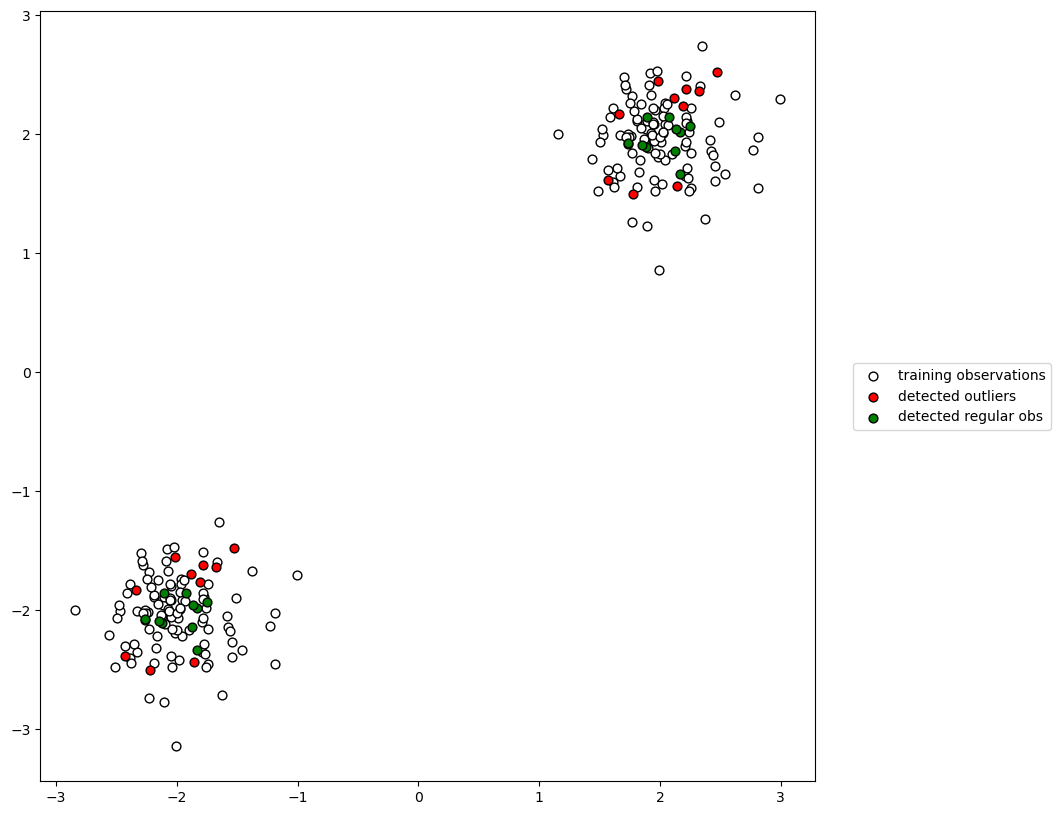

In [7]:
# ▶ Test set 검증
X_test['y']=y_pred_test

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*2, edgecolor='k', label="training observations")

p2 = plt.scatter(X_test.loc[X_test.y == -1, ['x1']], 
                 X_test.loc[X_test.y == -1, ['x2']], 
                 c='red', s=20*2, edgecolor='k', label="detected outliers")

p3 = plt.scatter(X_test.loc[X_test.y == 1, ['x1']], 
                 X_test.loc[X_test.y == 1, ['x2']], 
                 c='green', s=20*2, edgecolor='k', label="detected regular obs")

plt.legend(loc='center left', bbox_to_anchor=(1.04,0.5));
plt.gcf().set_size_inches(10, 10)

In [8]:
# ▶ 학습 data set을 얼만큼 정상으로 예측하였는지?
print("학습 데이터셋에서 정확도:", list(y_pred_train).count(1)/y_pred_train.shape[0])

# ▶ 정상 data set을 얼만큼 정상으로 예측하였는지?
print("테스트 데이터셋에서 정확도:", list(y_pred_test).count(1)/y_pred_test.shape[0])

# ▶ Outlier data set을 얼마나 Outlier로 예측하였는지?
print("이상치 데이터셋에서 정확도:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

학습 데이터셋에서 정확도: 0.5
테스트 데이터셋에서 정확도: 0.5
이상치 데이터셋에서 정확도: 1.0
